In [5]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1D, Gaussian Function

### Generate Data

In [11]:
n = 100
x = np.linspace(-1, 1, n).reshape(-1,1)
y = gaussian(x, 0, 0.01) - gaussian(x, -0.5, 0.01) - gaussian(x, 0.5, 0.01) 

x = np.hstack([x, x**2, x**3])

x = scaler(x, a=-np.pi/2, b=np.pi/2)
y = scaler(y, a=0.1, b=0.9)

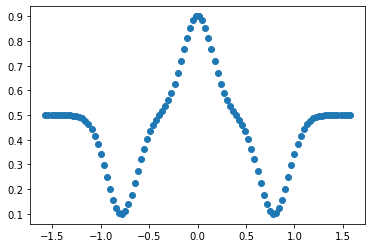

In [12]:
plt.plot(x[:,0], y, 'o')
plt.show()

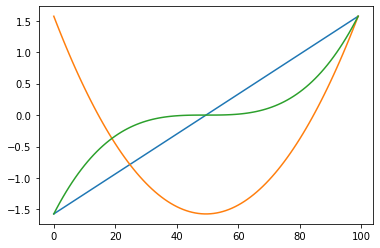

In [13]:
plt.plot(x)
plt.show()

### Train Models

In [16]:
np.random.seed(43)
backend = Aer.get_backend('qasm_simulator')

layer = QLayer(n_qubits=3, 
               n_features=3, 
               n_targets=1, 
               encoder=Encoder(), 
               ansatz=Ansatz(blocks=["entangle", "ry"], reps=2), 
               sampler=Parity(),
               backend=backend, 
               shots=10000)

model1 = NeuralNetwork([layer])

In [17]:
model1.train(x, y, epochs=50, verbose=True)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0, loss: 0.07855371595374985
epoch: 1, loss: 0.0671127891456542
epoch: 2, loss: 0.05758552713917835
epoch: 3, loss: 0.05092184494771267
epoch: 4, loss: 0.04752807654112513
epoch: 5, loss: 0.04567934882888534
epoch: 6, loss: 0.044615576310274116
epoch: 7, loss: 0.04489617304565865
epoch: 8, loss: 0.04622711480733699
epoch: 9, loss: 0.0450697079603032
epoch: 10, loss: 0.04390522000407297
epoch: 11, loss: 0.04279185680121799
epoch: 12, loss: 0.04085938993716564
epoch: 13, loss: 0.038270201595744506
epoch: 14, loss: 0.035397324495203025
epoch: 15, loss: 0.03272537515426148
epoch: 16, loss: 0.030347036442703878
epoch: 17, loss: 0.029000765878038962
epoch: 18, loss: 0.028350691458931015
epoch: 19, loss: 0.027684691332384482
epoch: 20, loss: 0.027465570772559244
epoch: 21, loss: 0.027559438193411667
epoch: 22, loss: 0.027432505802172744
epoch: 23, loss: 0.026895952217623805
epoch: 24, loss: 0.026157152193130705
epoch: 25, loss: 0.025693049597653398
epoch: 26, loss: 0.02491999480620338


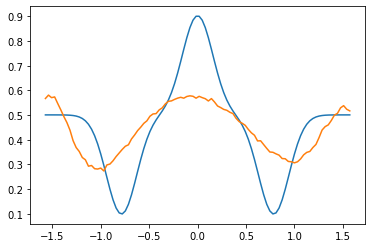

In [18]:
y_pred = model1.predict(x)
plt.plot(x[:,0], y)
plt.plot(x[:,0], y_pred)
plt.show()

In [ ]:
np.random.seed(43)
backend = Aer.get_backend('qasm_simulator')

layer = QLayer(n_qubits=3, 
               n_features=3, 
               n_targets=1, 
               encoder=Encoder(mode="z"), 
               ansatz=Ansatz(blocks=["entangle", "ry", "rz"], reps=2), 
               sampler=Parity(),
               backend=backend, 
               shots=10000)

model2 = NeuralNetwork([layer])

In [ ]:
model2.train(x, y, epochs=100, verbose=True)

In [ ]:
y_pred = model2.predict(x)

plt.plot(x[:,0], y)
plt.plot(x[:,0], y_pred)
plt.show()